In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

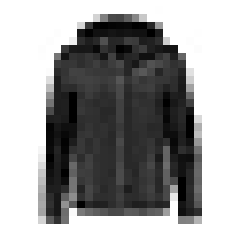

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

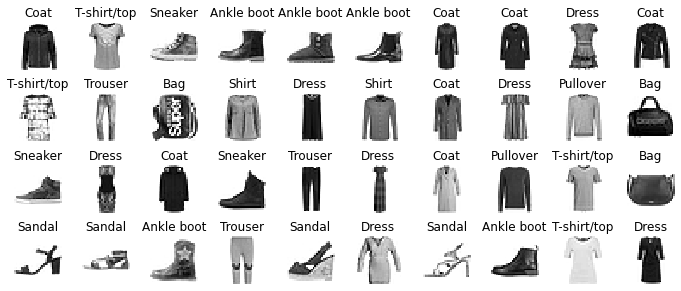

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(784, activation="relu"),
    keras.layers.Dense(28, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 28)                21980     
                                                                 
 dense_2 (Dense)             (None, 10)                290       
                                                                 
Total params: 637,710
Trainable params: 637,710
Non-trainable params: 0
_________________________________________________________________


In [15]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
model.layers[2].name

'dense_1'

In [17]:
weights, biases = model.layers[2].get_weights()

In [18]:
weights

array([[ 0.02051247,  0.03019074,  0.03162231, ...,  0.06511657,
        -0.075742  ,  0.05334122],
       [-0.07449015, -0.05751086,  0.06797951, ...,  0.02668607,
         0.08034188, -0.03590588],
       [-0.01390947,  0.01968379,  0.06596687, ..., -0.0614449 ,
        -0.02134842, -0.06096332],
       ...,
       [-0.04213622,  0.0690424 , -0.07531954, ..., -0.01384425,
         0.07878809, -0.04980563],
       [ 0.01280473, -0.00479205, -0.02628516, ..., -0.05621847,
        -0.03051617,  0.03182768],
       [ 0.05597045,  0.01320585, -0.0208343 , ..., -0.06963408,
         0.0026973 ,  0.0667529 ]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
weights.shape

(784, 28)

In [21]:
biases.shape

(28,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7091 - accuracy: 0.7678 - val_loss: 0.5047 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4821 - accuracy: 0.8318 - val_loss: 0.4347 - val_accuracy: 0.8558
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4389 - accuracy: 0.8460 - val_loss: 0.4041 - val_accuracy: 0.8616
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4130 - accuracy: 0.8552 - val_loss: 0.4136 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3933 - accuracy: 0.8613 - val_loss: 0.3823 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3761 - accuracy: 0.8670 - val_loss: 0.3666 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3614 - accuracy: 0.8717 - val_loss: 0.3678 - val_accuracy:

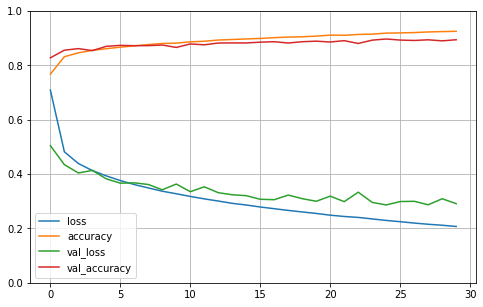

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8872


[0.32174962759017944, 0.8871999979019165]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 975us/step - loss: 0.8715 - val_loss: 0.7233
Epoch 2/20
363/363 [==============================] - 0s 810us/step - loss: 0.7953 - val_loss: 0.5874
Epoch 3/20
363/363 [==============================] - 0s 776us/step - loss: 0.5190 - val_loss: 0.5009
Epoch 4/20
363/363 [==============================] - 0s 779us/step - loss: 0.4770 - val_loss: 0.4708
Epoch 5/20
363/363 [==============================] - 0s 782us/step - loss: 0.4612 - val_loss: 0.4577
Epoch 6/20
363/363 [==============================] - 0s 790us/step - loss: 0.4454 - val_loss: 0.4554
Epoch 7/20
363/363 [==============================] - 0s 776us/step - loss: 0.4350 - val_loss: 0.4399
Epoch 8/20
363/363 [==============================] - 0s 768us/step - loss: 0.4291 - val_loss: 0.4368
Epoch 9/20
363/363 [==============================] - 0s 782us/step - loss: 0.4253 - val_loss: 0.4307
Epoch 10/20
363/363 [==============================] - 0s 776us/step - loss: 0.415

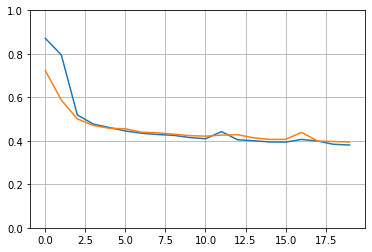

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
y_pred

array([[1.6302361],
       [2.5070558],
       [1.655421 ]], dtype=float32)

In [31]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [34]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0228 - val_loss: 0.8982
Epoch 2/20
363/363 [==============================] - 0s 892us/step - loss: 0.7812 - val_loss: 0.7377
Epoch 3/20
363/363 [==============================] - 0s 892us/step - loss: 0.6967 - val_loss: 0.6822
Epoch 4/20
363/363 [==============================] - 0s 887us/step - loss: 0.6553 - val_loss: 0.6468
Epoch 5/20
363/363 [==============================] - 0s 879us/step - loss: 0.6271 - val_loss: 0.6201
Epoch 6/20
363/363 [==============================] - 0s 887us/step - loss: 0.6063 - val_loss: 0.6008
Epoch 7/20
363/363 [==============================] - 0s 884us/step - loss: 0.5896 - val_loss: 0.5824
Epoch 8/20
363/363 [==============================] - 0s 879us/step - loss: 0.5768 - val_loss: 0.5700
Epoch 9/20
363/363 [==============================] - 0s 894us/step - loss: 0.5649 - val_loss: 0.5580
Epoch 10/20
363/363 [==============================] - 0s 881us/step - loss: 0.5557 

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [36]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [37]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0624 - main_output_loss: 0.9198 - aux_output_loss: 2.3454 - val_loss: 0.8410 - val_main_output_loss: 0.7878 - val_aux_output_loss: 1.3201
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6766 - main_output_loss: 0.6123 - aux_output_loss: 1.2550 - val_loss: 0.5714 - val_main_output_loss: 0.5131 - val_aux_output_loss: 1.0962
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5574 - main_output_loss: 0.5051 - aux_output_loss: 1.0288 - val_loss: 0.5349 - val_main_output_loss: 0.4903 - val_aux_output_loss: 0.9368
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5205 - main_output_loss: 0.4793 - aux_output_loss: 0.8912 - val_loss: 0.5149 - val_main_output_loss: 0.4791 - val_aux_output_loss: 0.8367
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5025 - main_output_loss: 0.4692 - aux_output_loss: 0.8020 - val_loss

In [38]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 752us/step - loss: 0.3761 - main_output_loss: 0.3582 - aux_output_loss: 0.5372


In [39]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [40]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [41]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.7948 - output_1_loss: 2.6042 - output_2_loss: 4.5101 - val_loss: 1.3687 - val_output_1_loss: 1.1114 - val_output_2_loss: 3.6841
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.1567 - output_1_loss: 0.9364 - output_2_loss: 3.1397 - val_loss: 1.0097 - val_output_1_loss: 0.8386 - val_output_2_loss: 2.5500
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9344 - output_1_loss: 0.7797 - output_2_loss: 2.3268 - val_loss: 0.8794 - val_output_1_loss: 0.7569 - val_output_2_loss: 1.9818
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8403 - output_1_loss: 0.7199 - output_2_loss: 1.9246 - val_loss: 0.8124 - val_output_1_loss: 0.7124 - val_output_2_loss: 1.7124
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7872 - output_1_loss: 0.6829 - output_2_loss: 1.7257 - val_loss: 0.7692 - val_output_1_loss: 0.6783 - val_ou

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.2438 - val_loss: 0.5949
Epoch 2/10
363/363 [==============================] - 0s 815us/step - loss: 2.0338 - val_loss: 0.5366
Epoch 3/10
363/363 [==============================] - 0s 826us/step - loss: 0.4517 - val_loss: 0.4193
Epoch 4/10
363/363 [==============================] - 0s 823us/step - loss: 0.4083 - val_loss: 0.3897
Epoch 5/10
363/363 [==============================] - 0s 815us/step - loss: 0.6478 - val_loss: 0.5063
Epoch 6/10
363/363 [==============================] - 0s 826us/step - loss: 0.4413 - val_loss: 0.4077
Epoch 7/10
363/363 [==============================] - 0s 812us/step - loss: 0.3874 - val_loss: 0.3900
Epoch 8/10
363/363 [==============================] - 0s 818us/step - loss: 0.3679 - val_loss: 0.3715
Epoch 9/10
363/363 [==============================] - 0s 826us/step - loss: 0.3638 - val_loss: 0.3678
Epoch 10/10
162/162 [==============================] - 0s 596us/step - loss: 0.3443


In [44]:
model.save("my_model.h5")

In [45]:
model = keras.models.load_model("my_model.h5")

In [46]:
model.predict(X_new)

array([[1.3017472],
       [2.4227128],
       [1.5772861]], dtype=float32)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss="mse", optimizer="sgd")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.9409 - val_loss: 0.6386
Epoch 2/10
363/363 [==============================] - 0s 881us/step - loss: 0.5680 - val_loss: 0.4812
Epoch 3/10
363/363 [==============================] - 0s 870us/step - loss: 0.4532 - val_loss: 0.4607
Epoch 4/10
363/363 [==============================] - 0s 868us/step - loss: 0.4254 - val_loss: 0.4232
Epoch 5/10
363/363 [==============================] - 0s 859us/step - loss: 0.4100 - val_loss: 0.4145
Epoch 6/10
363/363 [==============================] - 0s 868us/step - loss: 0.3989 - val_loss: 0.4074
Epoch 7/10
363/363 [==============================] - 0s 865us/step - loss: 0.3895 - val_loss: 0.3956
Epoch 8/10
363/363 [==============================] - 0s 845us/step - loss: 0.3818 - val_loss: 0.3985
Epoch 9/10
363/363 [==============================] - 0s 865us/step - loss: 0.3756 - val_loss: 0.3876
Epoch 10/10
162/162 [==============================] - 0s 603us/step - loss: 0.3656


In [49]:
model.compile(loss="mse", optimizer="sgd")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3647 - val_loss: 0.3828
Epoch 2/100
363/363 [==============================] - 0s 981us/step - loss: 0.3622 - val_loss: 0.3732
Epoch 3/100
363/363 [==============================] - 0s 859us/step - loss: 0.3592 - val_loss: 0.3683
Epoch 4/100
363/363 [==============================] - 0s 862us/step - loss: 0.3534 - val_loss: 0.3664
Epoch 5/100
363/363 [==============================] - 0s 812us/step - loss: 0.3512 - val_loss: 0.3702
Epoch 6/100
363/363 [==============================] - 0s 858us/step - loss: 0.3495 - val_loss: 0.3589
Epoch 7/100
363/363 [==============================] - 0s 862us/step - loss: 0.3435 - val_loss: 0.3564
Epoch 8/100
363/363 [==============================] - 0s 865us/step - loss: 0.3407 - val_loss: 0.3560
Epoch 9/100
363/363 [==============================] - 0s 868us/step - loss: 0.3361 - val_loss: 0.3506
Epoch 10/100
363/363 [==============================] - 0s 823us/step - los

In [52]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [56]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

312/363 [========================>.....] - ETA: 0s - loss: 0.2770
val/train: 1.08
363/363 [==============================] - 0s 901us/step - loss: 0.2788 - val_loss: 0.3000


In [58]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_03_07-14_51_17'

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="sgd")

In [60]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8470 - val_loss: 0.5185
Epoch 2/30
363/363 [==============================] - 0s 981us/step - loss: 0.4897 - val_loss: 0.4583
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4491 - val_loss: 0.4351
Epoch 4/30
363/363 [==============================] - 0s 973us/step - loss: 0.4288 - val_loss: 0.4264
Epoch 5/30
363/363 [==============================] - 0s 978us/step - loss: 0.4175 - val_loss: 0.4103
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4043 - val_loss: 0.4052
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3958 - val_loss: 0.4004
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3861 - val_loss: 0.3883
Epoch 9/30
363/363 [==============================] - 0s 848us/step - loss: 0.3788 - val_loss: 0.3766
Epoch 10/30
363/363 [==============================] - 0s 857us/step - loss: 0.3705 - val_lo